In [11]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

Задаем матрицу переходных вероятностей - A и матрицу эмиссий - E:

In [12]:
v1 = float(1/6)
v2 = 0.1
A = np.array([[0.95, 0.05], [0.1, 0.9]], float)
E = np.array([[v1, v1, v1, v1, v1, v1], [v2, v2, v2, v2, v2, 0.5]], float)

Затем задаем длину последовательности - L и вектор стационарного распределения - s:

In [13]:
L = 400
s = np.array([2/3, 1/3])

При заданных A и E получим вектора действительных состояний - state и наблюдений - observation.
Сначала получим число от 0 до 1 и зададим нулевое состояние - satet[0], после чего найдем первое наблюдение, а затем вектор состояний и вектор наблюдений для заданной длины последовательности - L:

In [14]:
observation = np.zeros((L,),dtype=int)
state = np.zeros((L,),dtype=int)

D = np.random.random() #кость
N = np.random.random() #число

if 0 <= N < 2/3:
    state[0] = 0
else:
    state[0] = 1
    
k = 0
for i in range(6):
    k += E[state[0], i]
    if N < k:
        observation[0] = i + 1 
        break;
        
for j in range(1, L):
    D = np.random.random()
    N = np.random.random()
    k1 = 0
    k2 = 0
    for i in range(2):
        k1 += A[state[j - 1], i]
        if D < k1:
            state[j] = i
            break;
    for i in range(6):
        k2 += E[state[j], i]
        if N < k2:
            observation[j] = i + 1
            break;
            
print("Вектор наблюдений:\n", observation)
print("\nВектор состояний:\n", state)

Вектор наблюдений:
 [4 2 2 4 2 3 4 4 6 2 2 4 4 3 4 4 6 3 6 6 1 2 4 6 5 1 5 4 2 1 1 4 3 6 3 4 6
 5 4 6 6 6 1 4 6 6 4 5 6 6 2 1 4 3 1 5 5 2 2 4 6 6 5 4 5 2 4 6 1 5 4 4 5 6
 6 6 3 4 2 5 2 2 5 5 2 6 1 4 3 3 6 3 2 6 2 6 1 5 5 5 5 1 5 6 2 1 3 2 3 4 3
 3 3 1 6 6 6 3 1 5 1 2 5 1 6 1 5 6 3 6 5 2 1 5 3 3 1 4 2 5 2 2 5 5 3 4 2 5
 6 5 1 5 1 2 5 6 4 2 5 6 5 2 2 6 6 1 2 1 1 6 3 6 6 6 5 4 2 1 3 6 6 3 1 5 4
 6 1 1 5 4 5 4 6 5 6 1 4 3 6 4 5 6 4 3 4 2 4 2 3 4 5 4 5 1 3 5 3 2 4 2 2 6
 4 6 4 4 3 2 6 2 1 6 6 4 5 6 6 4 6 6 5 4 4 6 5 6 2 5 6 6 3 6 1 6 1 1 4 4 4
 6 6 1 5 4 2 3 6 4 3 3 2 6 2 2 3 3 3 4 3 4 6 2 6 2 6 5 6 6 2 6 6 6 5 5 6 4
 5 6 6 6 1 3 2 3 2 4 6 6 6 6 6 2 6 6 1 4 6 4 6 2 5 3 6 4 6 3 6 6 1 6 6 6 6
 6 6 5 5 5 3 2 4 3 1 5 3 6 1 3 2 2 6 2 2 2 6 4 3 2 2 1 3 3 1 2 1 1 1 1 2 4
 4 1 4 6 3 5 6 5 3 4 4 3 1 6 2 1 4 5 3 6 2 4 4 3 2 3 3 3 2 5]

Вектор состояний:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

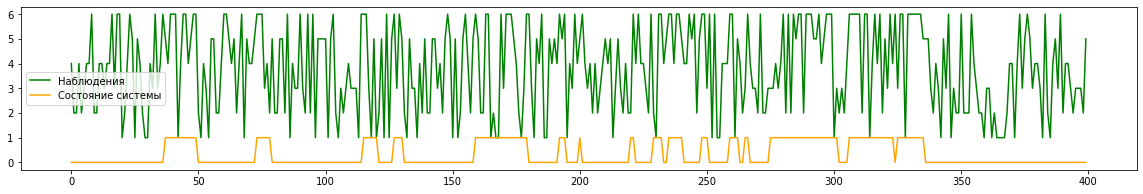

In [15]:
fig, ax = plt.subplots()
a1 = np.arange(L)
b1 = observation
a2 = np.arange(L)
b2 = state
ax.plot(a1, b1, color = "Green", label = "Наблюдения")
ax.plot(a2, b2, color = "Orange", label = "Состояние системы")
ax.legend()
fig.set_size_inches(20, 3)
plt.show()

#### Алгоритм Витерби

In [16]:
V = np.zeros((2,L))
P = np.zeros((2,L), dtype = int)
most_probable_cond = np.zeros((L,), dtype = int)

V[:,0] = s * E[:,observation[0] - 1]

for i in range(1, L):
    for j in range(2):
        V[j,i] = np.max(V[:,i - 1] * A[:,j] * E[:,observation[i] - 1])
        P[j,i] = np.argmax(V[:,i - 1] * A[:,j] * E[:,observation[i] - 1])
    V[:,i] /= np.max(V[:,i])
most_probable_cond[-1] = np.argmax(V[:,-1])

for i in range(L-2, -1, -1):
    most_probable_cond[i] = P[most_probable_cond[i + 1],i + 1]
print("Массив наиболее вероятных состояний:\n", most_probable_cond)

overlap = 0
for i in range(L):
    if state[i] == most_probable_cond[i]:
        overlap = overlap + 1
print("\nКоличество бросков = L =", L, "\nКоличество совпадений =", overlap)

Массив наиболее вероятных состояний:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Количество бросков = L = 400 
Количество совпадений = 315


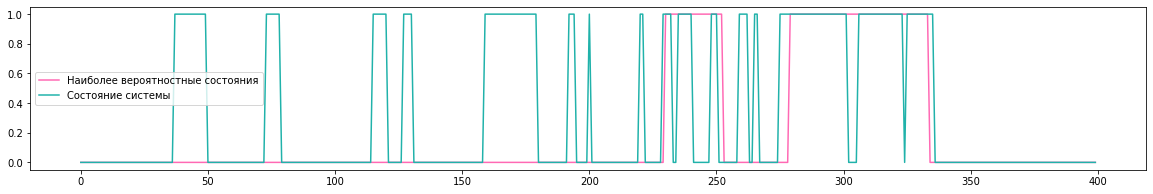

In [17]:
fig, ax = plt.subplots()
a1 = np.arange(L)
b1 = most_probable_cond
a2 = np.arange(L)
b2 = state
ax.plot(a1, b1, color = "Hotpink", label = "Наиболее вероятностные состояния")
ax.plot(a2, b2, color = "Lightseagreen", label = "Состояние системы")
ax.legend()
fig.set_size_inches(20, 3)
plt.show()

#### Алгоритм просмотра вперед

In [18]:
forward_pr = [[0]*(L + 1), [0]*(L + 1)]
forward_pr[0][0] = 1
forward_pr[1][0] = 1
forward_pr[0][1] = E[0][observation[0]-1] * (2 / 3)
forward_pr[1][1] = E[1][observation[0]-1] * (1 / 3)

for i in range(2, L+1):
    forward_pr[0][i] = E[0][observation[i-1]-1] * (forward_pr[0][i-1] * A[0][0] + forward_pr[1][i-1] * A[1][0])
    forward_pr[1][i] = E[1][observation[i-1]-1] * (forward_pr[1][i-1] * A[1][1] + forward_pr[0][i-1] * A[0][1])

norm_observation_pr = forward_pr[0][-1] + forward_pr[1][-1]
print("Нормированная вероятность наблюдения:\n", norm_observation_pr)

Нормированная вероятность наблюдения:
 5.113992656240949e-305


#### Алгоритм просмотра назад

In [19]:
backward_pr = [[0]*(L + 1), [0]*(L + 1)]
backward_pr[0][-1] = 1
backward_pr[1][-1] = 1

for i in range(L-1, -1, -1):
    backward_pr[0][i] = E[0][observation[i]-1] * backward_pr[0][i+1] * A[0][0] + \
                        E[1][observation[i]-1] * backward_pr[1][i+1] * A[0][1]
    backward_pr[1][i] = E[1][observation[i]-1] * backward_pr[1][i+1] * A[1][1] + \
                        E[0][observation[i]-1] * backward_pr[0][i+1] * A[1][0]
    
backward_pr[0][0] = backward_pr[0][0] * (2 / 3)
backward_pr[1][0] = backward_pr[1][0] * (1 / 3)

norm_observation_pr_back = backward_pr[0][0] + backward_pr[1][0]
print("Нормированная вероятность наблюдения:\n", norm_observation_pr_back)

Нормированная вероятность наблюдения:
 5.11399265624096e-305


#### Апостериорное декодирование

In [20]:
decoding = [0] * (L + 1)

for i in range(L+1):
    decoding[i] = (forward_pr[0][i] * backward_pr[0][i]) / (forward_pr[0][-1] + forward_pr[1][-1])

print(decoding)

[0.8907651199434306, 0.9303119058158006, 0.9519443673091567, 0.9633017324920351, 0.9683947101280366, 0.9690218203588162, 0.9654045191697916, 0.9562654027489178, 0.9383771086110975, 0.9054226136696224, 0.9313156561874332, 0.9428216529564749, 0.9440038000906784, 0.9352795577839066, 0.913568071056846, 0.8712022050868625, 0.7932209942637719, 0.6520863678635771, 0.6273739923260838, 0.5554590032485068, 0.5724359221253726, 0.6990931525617846, 0.7640219919660854, 0.7901512324494799, 0.7867080822689473, 0.868436130596336, 0.9130625179188239, 0.9363464841516662, 0.9465104652135587, 0.9471437414755731, 0.9384699463784721, 0.9174260397320838, 0.876580634110889, 0.8015096950984621, 0.6657028773690418, 0.6434752632253533, 0.575711176494353, 0.43848059360691727, 0.41376170197466355, 0.3351522605575202, 0.17489234700406073, 0.12590576155416974, 0.12820795006381414, 0.18461796493352897, 0.1948315700993013, 0.16245557005202446, 0.1843482950056735, 0.2873176013005502, 0.3289654669016644, 0.32399930473991